In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


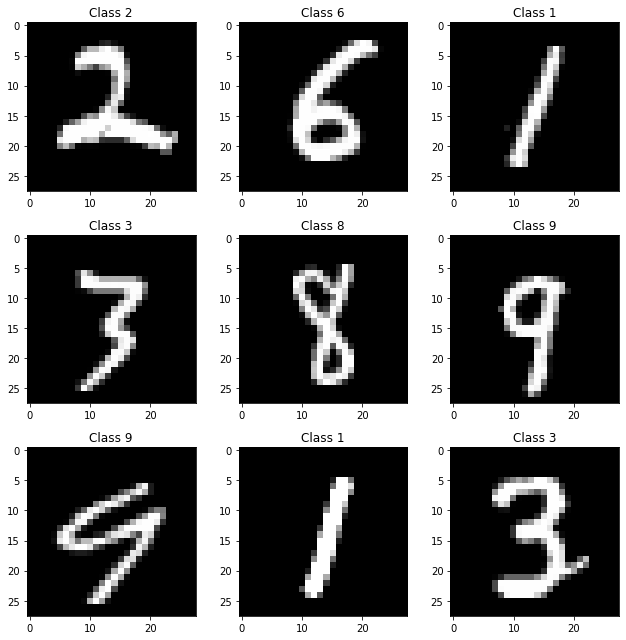

In [3]:

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(x_train))
  plt.imshow(x_train[num], cmap='gray', interpolation='none')
  plt.title(f"Class {y_train[num]}")

plt.tight_layout()

In [4]:
def matprint(mat):
    for raw in mat:
        for pixel in raw:
            print(f"{pixel:3d}", end=" ")
        print("")

matprint(x_train[num])

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0  23  83 132 168 139 184 255 254 213 120   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0  23 155 254 254 254 254 254 254 254 254 253  55   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 152 254 254 254 187 180 135  95 148 254 254 134   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 246 254 254 121   2   0   0   0  39 254 254 235  17   0   0   0   0 

In [5]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("x_rain flatten shape", x_train.shape)
print("x_este flatten shape", x_test.shape)

x_rain flatten shape (60000, 784)
x_este flatten shape (10000, 784)


In [6]:
def flatprint(flat):
    for i in range(int(len(flat)/28)):
        raw = flat[i*28:(i+1)*28]
        for pixel in raw:
            print(f"{int(pixel>0)*111:3d}", end=" ") 
        print("")

flatprint(x_train[num])

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0 111 111 111 111 111 111 111 111 111 111   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 111 111 111 111 111 111 111 111 111 111 111 111   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 111 111 111 111 111 111 111 111 111 111 111 111   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 111 111 111 111 111   0   0   0 111 111 111 111 111   0   0   0   0 

In [7]:
nb_classes = 10

onehot_y_train = np.array([range(nb_classes)]*len(y_train))+1#np.zeros((len(y_train), nb_classes))
onehot_y_train = onehot_y_train/(y_train+1).reshape(-1,1) == 1   #[:, ]
onehot_y_train = onehot_y_train.astype('int')

onehot_y_test = np.array([range(nb_classes)]*len(y_test))+1#np.zeros((len(y_train), nb_classes))
onehot_y_test = onehot_y_test/(y_test+1).reshape(-1,1) == 1   #[:, ]
onehot_y_test = onehot_y_test.astype('int')

print(f"Train class -> { y_train[0]}")
print(f"Train class categorical -> { onehot_y_train[0]}")

print('')

print(f"Test class -> { y_test[0]}")
print(f"Testclass categorical -> { onehot_y_test[0]}")

Train class -> 5
Train class categorical -> [0 0 0 0 0 1 0 0 0 0]

Test class -> 7
Testclass categorical -> [0 0 0 0 0 0 0 1 0 0]


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_val, onehot_y_train, onehot_y_val = train_test_split(x_train, onehot_y_train, test_size=0.1)

print(f"x_train shape => {x_train.shape}")
print(f"y_train shape => {onehot_y_train.shape}")
print('')
print(f"x_val shape => {x_val.shape}")
print(f"y_val shape => {onehot_y_val.shape}")
print('')
print(f"x_test shape => {x_test.shape}")
print(f"y_test shape => {onehot_y_test.shape}")
print('')

x_train shape => (54000, 784)
y_train shape => (54000, 10)

x_val shape => (6000, 784)
y_val shape => (6000, 10)

x_test shape => (10000, 784)
y_test shape => (10000, 10)



In [9]:
import tensorflow.keras as tfk



network = tfk.models.Sequential()
network.add(tfk.layers.Dense(512, activation = 'linear', input_shape = x_train.shape[1:]))
network.add(tfk.layers.Dropout(0.4))
# network.add(tfk.layers.Dense(512, activation = 'linear', input_shape = x_train.shape[1:]))
# network.add(tfk.layers.Dropout(0.33))
# network.add(tfk.layers.Dense(1028, activation = 'linear'))
# # network.add(tfk.layers.Dropout(0.33))

network.add(tfk.layers.Dense(256, activation = 'linear'))
network.add(tfk.layers.Dropout(0.33))

# network.add(tfk.layers.Dense(256, activation = 'linear'))
# network.add(tfk.layers.Dropout(0.33))

network.add(tfk.layers.Dense(128, activation = 'linear'))
network.add(tfk.layers.Dropout(0.33))

network.add(tfk.layers.Dense(nb_classes, activation = 'softmax'))
network.compile(optimizer = 'Nadam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [10]:

EPOCHS = 100
BATCH_SIZE = 128

history = network.fit(x=x_train, y=onehot_y_train,
                        validation_data=(x_val, onehot_y_val),
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE)


Epoch 1/100
422/422 [==============================] - 8s 8ms/step - loss: 0.5459 - accuracy: 0.8411 - val_loss: 0.3536 - val_accuracy: 0.9010
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.4249 - accuracy: 0.8790 - val_loss: 0.3106 - val_accuracy: 0.9142
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3933 - accuracy: 0.8879 - val_loss: 0.3121 - val_accuracy: 0.9183
Epoch 4/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3797 - accuracy: 0.8935 - val_loss: 0.3059 - val_accuracy: 0.9177
Epoch 5/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3654 - accuracy: 0.8955 - val_loss: 0.3056 - val_accuracy: 0.9185
Epoch 6/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3569 - accuracy: 0.8986 - val_loss: 0.2977 - val_accuracy: 0.9185
Epoch 7/100
422/422 [==============================] - 2s 5ms/step - loss: 0.3531 - accuracy: 0.8994 - val_loss: 0.2946 - val_accuracy: 0.9173

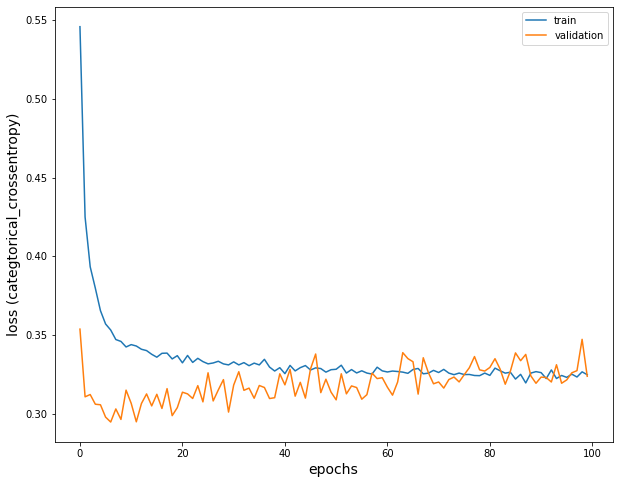

In [11]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss (categtorical_crossentropy)', fontsize=14)
plt.legend()

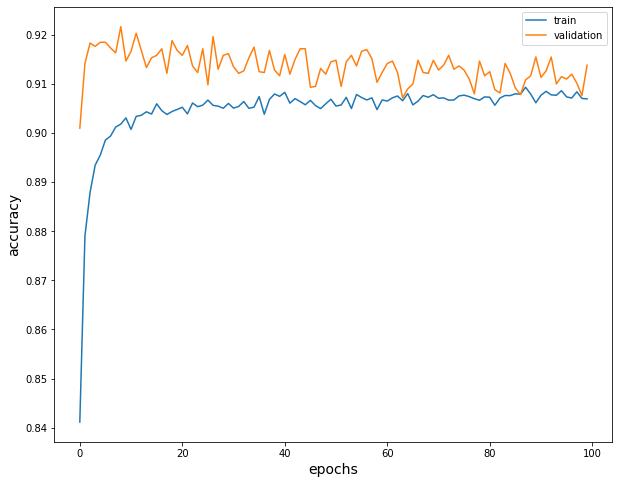

In [12]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')

plt.xlabel('epochs', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.legend()

In [16]:
predictions = network.predict(x_test)
plt.rcParams['figure.figsize'] = (9,9)


313/313 [==============================] - 1s 2ms/step


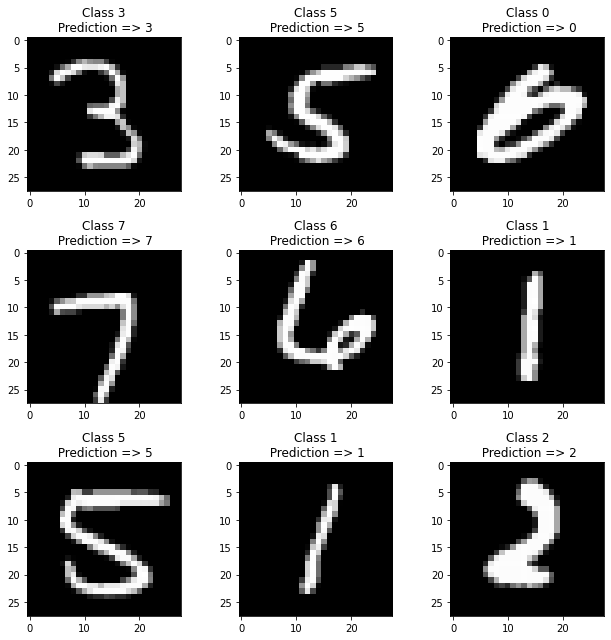

In [17]:

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0,len(x_test))
  plt.imshow(x_test.reshape(x_test.shape[0], 28,28)[num], cmap='gray', interpolation='none')
  plt.title(f"Class {y_test[num]}\n Prediction => {predictions[num].argmax()}")

plt.tight_layout()

(array([5349., 6068., 5365., 5538., 5258., 4899., 5330., 5615., 5261.,
        5317.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

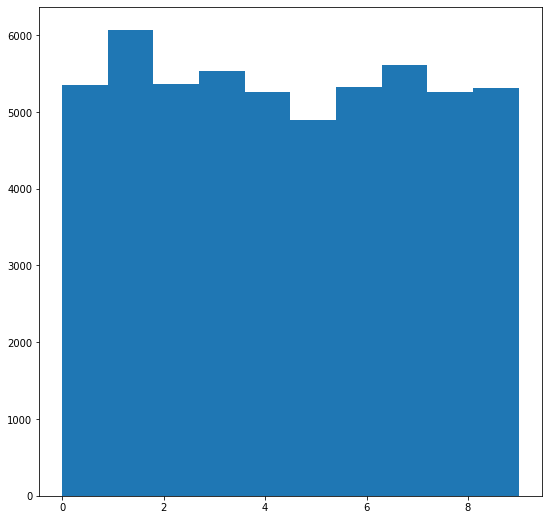

In [21]:
plt.hist(onehot_y_train.argmax(axis=1), bins=10)

In [27]:
predictions[isclass]

array([[9.99497652e-01, 5.74713788e-08, 5.94101402e-05, ...,
        6.60290834e-06, 2.27875080e-06, 1.69798184e-07],
       [9.72335994e-01, 5.18882075e-08, 1.80358835e-03, ...,
        3.67083629e-07, 1.91270106e-03, 3.34274262e-07],
       [9.95846093e-01, 1.51437135e-07, 2.83658737e-04, ...,
        1.76754402e-05, 2.42443546e-03, 1.25749211e-04],
       ...,
       [9.94809031e-01, 1.47420556e-08, 9.10199247e-04, ...,
        2.44938946e-07, 2.41170055e-05, 1.42105945e-08],
       [9.99954700e-01, 1.74951772e-11, 1.93312530e-08, ...,
        4.28592634e-10, 1.79876167e-06, 2.72911665e-10],
       [9.99359190e-01, 1.32307129e-13, 1.45901968e-09, ...,
        1.87431324e-15, 5.13138541e-04, 5.12675709e-12]], dtype=float32)

In [29]:
for classe in range(10):

    isclass = y_test == classe

    rightperc = sum(predictions.argmax(axis=1)[isclass] == y_test[isclass])/sum(isclass)




    print(f"Percentual de arcetos pro dígito {classe} => {rightperc*100:.2f}%")


Percentual de arcetos pro dígito 0 => 95.20%
Percentual de arcetos pro dígito 1 => 97.36%
Percentual de arcetos pro dígito 2 => 89.24%
Percentual de arcetos pro dígito 3 => 90.79%
Percentual de arcetos pro dígito 4 => 92.77%
Percentual de arcetos pro dígito 5 => 84.98%
Percentual de arcetos pro dígito 6 => 95.72%
Percentual de arcetos pro dígito 7 => 93.58%
Percentual de arcetos pro dígito 8 => 89.94%
Percentual de arcetos pro dígito 9 => 89.20%
